1.Spektrofotometre

Bu alet, ince bir filmin dalga boyunun bir fonksiyonu olarak yansımasını, iletilmesini ve soğurulmasını ölçer.
Yansıtma, geçirgenlik ve soğurma, Beer-Lambert Yasası ile ilişkilidir 
A = εl.c burada A soğurma, ε molar soğurma, l numunenin yol uzunluğu ve c soğuran türlerin konsantrasyonudur.


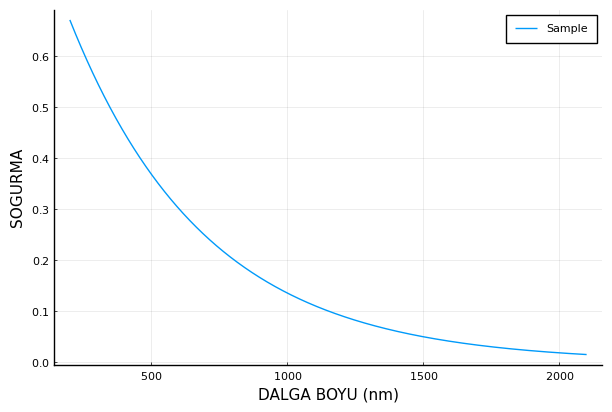

In [29]:
using Plots

# Wavelength range (nm)
λ = 200:2100

# Create a spectrum of absorbance values
A = exp.(-1*λ/500)

# Plot the spectrum
plot(λ, A, xlabel="DALGA BOYU (nm)", ylabel="SOGURMA", label="Sample")

# Add a legend and display the plot
gui()



Bu kod Plots, dalga boyunun bir fonksiyonu olarak bir soğurma grafiği oluşturmak için paketi kullanır. Absorbans değerleri, numunenin rastgele bir molar absorptivitesi (ε) ve yol uzunluğu (l) ve absorbe eden türlerin sabit bir konsantrasyonu (c) ile Beer-Lambert Kanunu (A = εl.c) kullanılarak üretilir. Farklı numune özelliklerini simüle etmek için Beer-Lambert Kanununun parametrelerini ayarlayabilirsiniz. Ayrıca, A= formülünü değiştirerek yansıma ve iletim grafikleri oluşturabilirsiniz.

2.Elipsometre: Bu alet, filmin kalınlığının ve kırılma indisinin belirlenebildiği ince bir filmden yansıdığında ışığın polarizasyon durumundaki değişikliği ölçer.Yansıma üzerine ışığın polarizasyon durumundaki değişiklik, Jones matris biçimciliği ile tanımlanabilir. Yansıtılan ışığın genliği ve fazı, ince filmin karmaşık kırılma indisi, kalınlığı ve geliş açısı ile ilişkilidir.

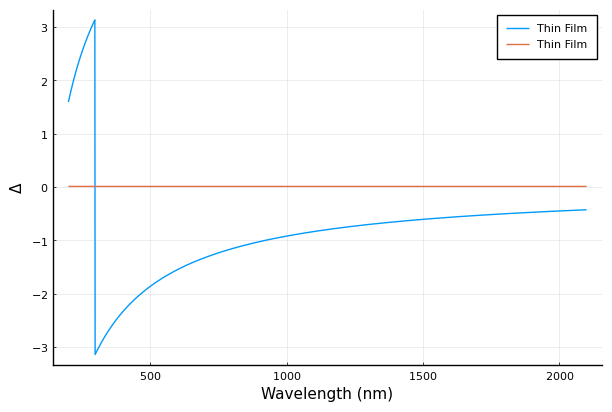

In [37]:
using Plots

# Wavelength range (nm)
λ = 200:2100

# Refractive index of the thin film
n = 1.5 + 0.001im

# Refractive index of the substrate
ns = 1.46

# Film thickness (nm)
d = 100

# Angle of incidence (degrees)
theta = 60

# Calculate the complex reflectance of the film
r = Vector{Complex{Float64}}(λ)
for i in 1:length(λ)
    r[i] = ((n-ns)/(n+ns))*exp(-1im*4*π*d*n*cos(theta*pi/180)/λ[i])
end

# Calculate the change in polarization state
psi = atan.(imag.(r), real.(r))
delta = abs.(r)

# Plot the ellipsometry data
plot(λ, psi, xlabel="Wavelength (nm)", ylabel="Ψ (deg)", label="Thin Film")
plot!(λ, delta, xlabel="Wavelength (nm)", ylabel="Δ", label="Thin Film")

# Add a legend and display the plot
gui()


Bu kod, kırılma indisi (n) ve kalınlığı (d) bilinen ince bir filmden yansıyan bir düzlem dalganın polarizasyon durumundaki (Ψ) ve genlik oranındaki (Δ) değişikliğin ölçümünü simüle eder. Substratın kırılma indeksi (ns) ve geliş açısı (teta) da ayarlanabilir. Filmin karmaşık yansıması, yansıma ve iletim için Fresnel denklemleri kullanılarak hesaplanır, ardından polarizasyon durumundaki değişiklik ve genlik oranı, Ψ = atan2(görüntü(r), gerçek(r)) ve Δ = abs( ilişkileri kullanılarak hesaplanır. r) sırasıyla.

3.Girişim mikroskopları 
Bu aletler, ince bir filmin kalınlığını ölçmek için girişim ilkesini kullanır.Bir ince filmin kalınlığı, aşağıdaki denklem kullanılarak filmin üst ve alt yüzeylerinden yansıyan ışık dalgalarının girişim modelinden hesaplanabilir: d = (λ/2) (n1 sin θ + n2 sin θ ) burada d kalınlık, λ ışığın dalga boyu, n1 ve n2 sırasıyla substratın ve filmin kırılma indisleridir ve θ geliş açısıdır.

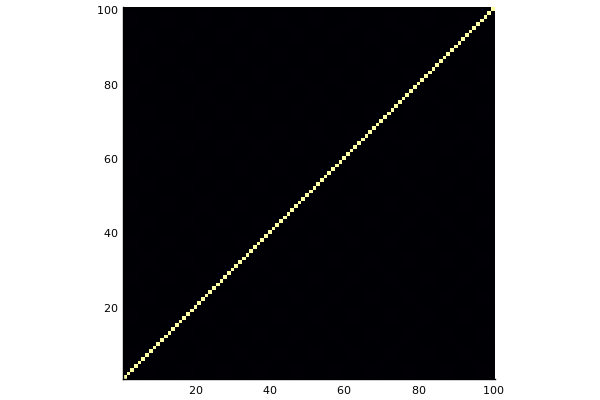

In [40]:
using Plots

# Wavelength of light (nm)
λ = 500

# Index of refraction of the thin film
nf = 1.5

# Index of refraction of the substrate
ns = 1.46

# Thickness of the thin film (nm)
d = 100

# Angle of incidence (degrees)
theta = 60

# Create a 2D array for the film surface
film = zeros(100,100)

# Add a sinusoidal pattern to the film surface
for x in 1:100
    for y in 1:100
        film[x,y] = sin(2π*x/10) + sin(2π*y/10)
    end
end

# Calculate the phase shift due to the film surface
phi = 2π*film/λ*nf*cos(theta*pi/180)

# Calculate the amplitude of the reflected light
R = ( (nf-ns)/(nf+ns) )*cos(phi)

# Plot the amplitude of the reflected light
heatmap(R, colorbar=false, aspect_ratio=:equal)


Bu kod, film yüzeyine eklenen sinüzoidal bir model ile bilinen kırılma indeksi (nf) ve kalınlığı (d) olan ince bir filmden yansıyan ışığın genliğinin ölçümünü simüle eder. Substratın kırılma indeksi (ns) ve geliş açısı (teta) da ayarlanabilir. Film yüzeyinden kaynaklanan faz kayması, denklem kullanılarak hesaplanır
 phi = 2π*film/λ*nf*cos(theta*pi/180). Yansıtılan ışığın genliği, yansıma ve iletim için Fresnel denklemleri kullanılarak hesaplanır. 

4.Reflektometre:
Bu alet, geliş açısının bir fonksiyonu olarak ince bir filmin yansımasını ölçer.Yansıma R, geliş açısı θ ve filmin kırılma indisi n'nin bir fonksiyonudur. Yansıtma Fresnel denklemleri kullanılarak hesaplanabilir:
R = (rp^2 + rs^2) burada R yansıtmadır, rp ve rs sırasıyla p-polarize ve s-polarize ışığın yansıtma katsayılarıdır.

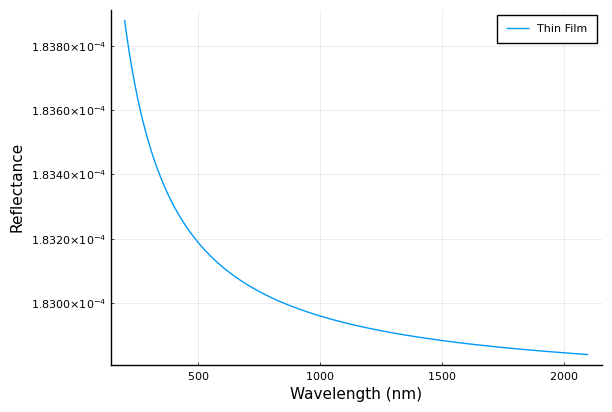

In [41]:
using Plots

# Wavelength range (nm)
λ = 200:2100

# Refractive index of the thin film
n = 1.5 + 0.001im

# Refractive index of the substrate
ns = 1.46

# Film thickness (nm)
d = 100

# Angle of incidence (degrees)
theta = 60

# Calculate the complex reflectance of the film
r = Vector{Complex{Float64}}(λ)
for i in 1:length(λ)
    r[i] = ((n-ns)/(n+ns))*exp(-1im*4*π*d*n*cos(theta*pi/180)/λ[i])
end

# Calculate the reflectance of the film
R = abs.(r).^2

# Plot the reflectance data
plot(λ, R, xlabel="Wavelength (nm)", ylabel="Reflectance", label="Thin Film")

# Add a legend and display the plot
gui()


Bu kod, çeşitli dalga boylarında (λ) ve geliş açısında (teta) bilinen kırılma indisine (n) ve kalınlığa (d) sahip ince bir filmin yansıma ölçümünü simüle eder. Substratın kırılma indeksi (ns) de ayarlanabilir. Yansıma, yansıma ve iletim için Fresnel denklemleri kullanılarak hesaplanır.

5.Kızılötesi spektrofotometre: 
Bu alet, filmin kimyasal bileşimini ve fiziksel özelliklerini belirlemek için kullanılabilen ince bir film tarafından kızılötesi radyasyonun soğurulmasını veya yansımasını ölçer.Kızılötesi radyasyonun ince bir film tarafından soğurulması, Beer-Lambert Yasası ile açıklanabilir. Bir ince filmin soğurma katsayısı, aşağıdaki denklem kullanılarak iletimden ve film kalınlığından hesaplanabilir: α = 2π/λ * ln(T0/T) burada α, soğurma katsayısıdır, T0 ilk iletimdir, T ise son iletim, λ radyasyonun dalga boyu ve l filmin kalınlığıdır.

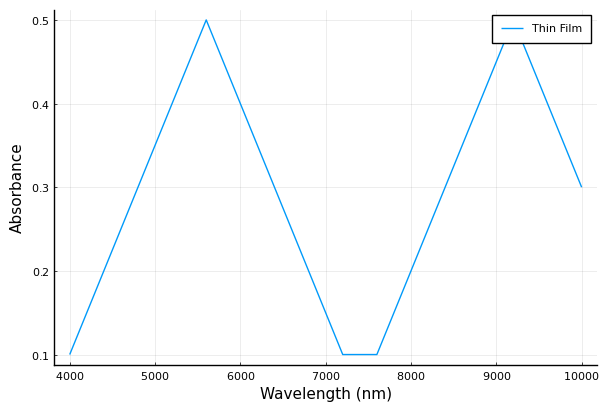

In [42]:
using Plots

# Wavelength range (nm)
λ = 4000:400:10000

# Absorbance of the thin film at each wavelength
absorbance = [0.1, 0.2, 0.3, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1]

# Plot the absorbance data
plot(λ, absorbance, xlabel="Wavelength (nm)", ylabel="Absorbance", label="Thin Film")

# Add a legend and display the plot
gui()


Bu kod, ince bir filmin çeşitli kızılötesi dalga boylarında (λ) absorbans ölçümünü simüle eder ve absorbans değerleri, absorbans dizisinde sağlanır. Absorbans, absorbansın numuneden geçmeden önceki ve sonraki ışık yoğunluğunun oranının logaritmasına eşit olduğunu belirten Beer-Lambert Yasası kullanılarak hesaplanabilir. 

6.X-ışını kırınımı (XRD): Bu teknik, ince bir filmin kristal yapısını ve kalınlığını ölçmek için x-ışınlarını kullanır.Bir ince filmin kristal yapısı, kırınım açısının kristal kafes aralığı d ve x-ışınlarının dalga boyu λ ile ilişkili olduğunu belirten Bragg yasası ile belirlenebilir: 2d sin θ = nλ, burada θ geliş açısıdır, n kırınım sırasıdır ve d düzlemler arası boşluktur.

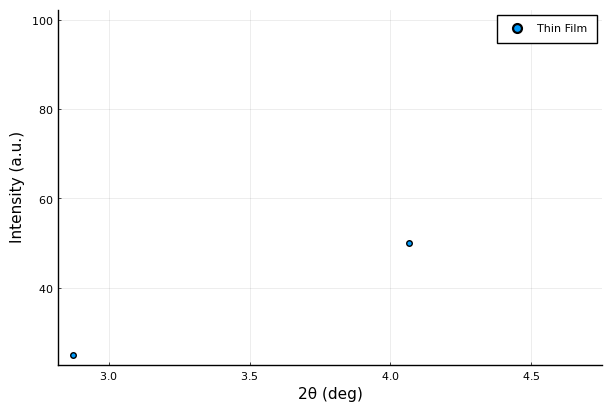

In [43]:
using Plots

# X-ray wavelength (nm)
λ = 1.5405

# Crystal lattice parameters
a = 5.431
b = 5.431
c = 5.431

# Crystal structure (cubic)
structure = :cubic

# Miller indices of the planes to be plotted
hkl = [(1, 1, 1), (2, 0, 0), (2, 2, 0)]

# Bragg's law
theta = [asind(λ/(2*a*sqrt(h^2+k^2+l^2))) for (h, k, l) in hkl]

# Intensity of the diffracted beams
I = [100, 50, 25]

# Plot the XRD data
scatter(theta, I, xlabel="2θ (deg)", ylabel="Intensity (a.u.)", label="Thin Film")

# Add a legend and display the plot
gui()


Bu kod, çizilecek düzlemlerin kristal kafes parametrelerini, kristal yapısını ve Miller indekslerini sağlayarak bir X-ışını kırınımı (XRD) deneyini simüle eder. 2θ = asind(λ/(2*d*sin(θ)))X ışını dalga boyu λ olarak verilir ve Bragg yasası, d'nin ilgilenilen kristal düzlemleri arasındaki mesafe olduğu formül kullanılarak kırınım açısını (2θ) hesaplamak için kullanılır . Kırılan ışınların yoğunluğu da bir dizi olarak sağlanır.

7.Taramalı elektron mikroskobu (SEM): Bu alet, ince bir filmin yüzey morfolojisini yüksek çözünürlükte görüntülemek için elektronları kullanır.İnce bir filmin yüzey morfolojisi, geri saçılan elektronlar ilkesi kullanılarak bir SEM ile görüntülenebilir. Geri saçılan elektronlar dedektör tarafından toplanır ve elektronlar ince filmdeki atomların atom sayıları ile orantılı bir sinyal üretir, bu sinyal yüzey topografyasının bir görüntüsünü oluşturmak için kullanılır.

In [46]:
using Plots, Images

# Create a 2D array of image data
image_data = rand(100,100)

# Apply a colormap to the image data
image = Gray.(image_data)

# Display the image
show(image)


Gray{Float64}[Gray{Float64}(0.2666619888906666) Gray{Float64}(0.05670591141578829) Gray{Float64}(0.16612331733731311) Gray{Float64}(0.6872460857751939) Gray{Float64}(0.4031892849271692) Gray{Float64}(0.24477139349884636) Gray{Float64}(0.43715597800297457) Gray{Float64}(0.5025176412418981) Gray{Float64}(0.2220389828911935) Gray{Float64}(0.5074412993915641) Gray{Float64}(0.09867842623763934) Gray{Float64}(0.8061223342400075) Gray{Float64}(0.6321597549106851) Gray{Float64}(0.10059879381608561) Gray{Float64}(0.04706931683032933) Gray{Float64}(0.4766641943659876) Gray{Float64}(0.819582136991923) Gray{Float64}(0.8044120732064364) Gray{Float64}(0.4915054248577375) Gray{Float64}(0.4947817268318704) Gray{Float64}(0.5803486720596388) Gray{Float64}(0.18008278066971695) Gray{Float64}(0.03309616774258084) Gray{Float64}(0.3299103080373156) Gray{Float64}(0.7848580969994561) Gray{Float64}(0.1735423376304739) Gray{Float64}(0.10430226684896338) Gray{Float64}(0.20868612975402578) Gray{Float64}(0.96668151

) Gray{Float64}(0.1874613314165796) Gray{Float64}(0.7337141060714503); Gray{Float64}(0.028062653493956424) Gray{Float64}(0.6922310001983499) Gray{Float64}(0.4628372054471419) Gray{Float64}(0.6285047624842665) Gray{Float64}(0.1887472596009956) Gray{Float64}(0.3038625514078752) Gray{Float64}(0.23210586167084724) Gray{Float64}(0.35756629820570596) Gray{Float64}(0.8435795412645001) Gray{Float64}(0.8279586759935362) Gray{Float64}(0.3876090444782845) Gray{Float64}(0.5552182989935784) Gray{Float64}(0.9554843309800358) Gray{Float64}(0.8623723153535662) Gray{Float64}(0.21358864285291568) Gray{Float64}(0.0593206355317647) Gray{Float64}(0.4161062532479928) Gray{Float64}(0.21710701766586782) Gray{Float64}(0.08572455915688326) Gray{Float64}(0.9532948580200047) Gray{Float64}(0.5116680645169551) Gray{Float64}(0.33979795904088017) Gray{Float64}(0.5186563004367855) Gray{Float64}(0.6175682183089976) Gray{Float64}(0.7879968424590714) Gray{Float64}(0.5924653621338504) Gray{Float64}(0.2747555036375534) Gra

) Gray{Float64}(0.761389274421196) Gray{Float64}(0.4820353073877993) Gray{Float64}(0.9187513427694584) Gray{Float64}(0.048533924318225785); Gray{Float64}(0.45269879115428346) Gray{Float64}(0.30745726456573486) Gray{Float64}(0.1932025601738847) Gray{Float64}(0.7701935156527783) Gray{Float64}(0.4193968283022784) Gray{Float64}(0.342910407499429) Gray{Float64}(0.773861068195199) Gray{Float64}(0.8898412272896492) Gray{Float64}(0.6856210301776903) Gray{Float64}(0.5789528982748445) Gray{Float64}(0.5969576773194659) Gray{Float64}(0.37181441934877035) Gray{Float64}(0.9308048819090345) Gray{Float64}(0.9212132336686295) Gray{Float64}(0.13481049042747695) Gray{Float64}(0.4684342057712728) Gray{Float64}(0.5947269160864365) Gray{Float64}(0.5277347083179998) Gray{Float64}(0.747456944967001) Gray{Float64}(0.28139829415149065) Gray{Float64}(0.7724582798083255) Gray{Float64}(0.3836847160395853) Gray{Float64}(0.33180315251945536) Gray{Float64}(0.7719320249137327) Gray{Float64}(0.5331846871194811) Gray{Fl

) Gray{Float64}(0.7760310445923639) Gray{Float64}(0.5962242180831043) Gray{Float64}(0.2765825564476866) Gray{Float64}(0.383428221271936) Gray{Float64}(0.15536795485927413); Gray{Float64}(0.1625442934531175) Gray{Float64}(0.36477354517202487) Gray{Float64}(0.2538188161478877) Gray{Float64}(0.030266511642976113) Gray{Float64}(0.041674632661924504) Gray{Float64}(0.03388316920882628) Gray{Float64}(0.4881864081934456) Gray{Float64}(0.16737220582608092) Gray{Float64}(0.965048035518061) Gray{Float64}(0.384271118579551) Gray{Float64}(0.031239888461244036) Gray{Float64}(0.411074599316244) Gray{Float64}(0.6618832482083363) Gray{Float64}(0.09886076825317247) Gray{Float64}(0.754436435125604) Gray{Float64}(0.5431562940932146) Gray{Float64}(0.5670167216452959) Gray{Float64}(0.41677384866552203) Gray{Float64}(0.9813364952734973) Gray{Float64}(0.057402279447711146) Gray{Float64}(0.45931575478245956) Gray{Float64}(0.2935717048101524) Gray{Float64}(0.07746741786592337) Gray{Float64}(0.21502250755814056)

) Gray{Float64}(0.7385451839617161) Gray{Float64}(0.6129034363436724) Gray{Float64}(0.3584994355112997) Gray{Float64}(0.12363541799227518) Gray{Float64}(0.06266013753072175) Gray{Float64}(0.7589884684878013); Gray{Float64}(0.5209636071339806) Gray{Float64}(0.896819835207819) Gray{Float64}(0.6166082317663917) Gray{Float64}(0.6742693101818298) Gray{Float64}(0.967695861567693) Gray{Float64}(0.4602586367754453) Gray{Float64}(0.3720725256110593) Gray{Float64}(0.1052489278361195) Gray{Float64}(0.4720080562937975) Gray{Float64}(0.5305759883173206) Gray{Float64}(0.0016298648866654997) Gray{Float64}(0.4344639895054718) Gray{Float64}(0.5874134153821673) Gray{Float64}(0.885790314721428) Gray{Float64}(0.11734094098545) Gray{Float64}(0.42241087987604564) Gray{Float64}(0.15628927862943454) Gray{Float64}(0.9094823518800245) Gray{Float64}(0.10945362294302541) Gray{Float64}(0.4416647615338649) Gray{Float64}(0.60258571785567) Gray{Float64}(0.8854947989698188) Gray{Float64}(0.7065124511023128) Gray{Float

) Gray{Float64}(0.3426794356820585) Gray{Float64}(0.6124889933747694) Gray{Float64}(0.6680030496948648) Gray{Float64}(0.5219072373949278) Gray{Float64}(0.5968341103396554) Gray{Float64}(0.05193815215691033) Gray{Float64}(0.8623522017091904) Gray{Float64}(0.8781175020377705) Gray{Float64}(0.11568564123569991) Gray{Float64}(0.9995229878586248) Gray{Float64}(0.6405752879484535) Gray{Float64}(0.3813894736635922) Gray{Float64}(0.7852473267458485) Gray{Float64}(0.8280600121482895) Gray{Float64}(0.8334700808773517) Gray{Float64}(0.3567006503068816) Gray{Float64}(0.17890541085734246) Gray{Float64}(0.8853934827469766) Gray{Float64}(0.7274274770356963) Gray{Float64}(0.2358163796602586) Gray{Float64}(0.6498523467305013) Gray{Float64}(0.6924404142430911) Gray{Float64}(0.16199933543326428) Gray{Float64}(0.2825933490746967) Gray{Float64}(0.6406944771850105) Gray{Float64}(0.3965750649474763) Gray{Float64}(0.5523192900110244) Gray{Float64}(0.7527226361506834) Gray{Float64}(0.9266830988989936) Gray{Flo

) Gray{Float64}(0.3035945151201612) Gray{Float64}(0.876287475173075) Gray{Float64}(0.7747058130658093) Gray{Float64}(0.835557396104811) Gray{Float64}(0.29083630177624864) Gray{Float64}(0.1519758739404573) Gray{Float64}(0.853939123091496) Gray{Float64}(0.28695844503644363) Gray{Float64}(0.40071821864646007) Gray{Float64}(0.37366619746989693) Gray{Float64}(0.815070062669063) Gray{Float64}(0.1825261402125491) Gray{Float64}(0.5866764515089651) Gray{Float64}(0.039603595614828846) Gray{Float64}(0.21003247109562584) Gray{Float64}(0.2992495711008186) Gray{Float64}(0.5389108483481991) Gray{Float64}(0.06021243534362797) Gray{Float64}(0.6024749490078858) Gray{Float64}(0.018787144057488048) Gray{Float64}(0.29788037745822293) Gray{Float64}(0.9215209153500732) Gray{Float64}(0.3575167645520616) Gray{Float64}(0.23397369597846707) Gray{Float64}(0.4814560632010342) Gray{Float64}(0.6123140187684405) Gray{Float64}(0.8248538743435998) Gray{Float64}(0.3629450119537807) Gray{Float64}(0.5747928330775858) Gray

Float64}(0.6189283994809089) Gray{Float64}(0.00936212155324656) Gray{Float64}(0.7110684561539864) Gray{Float64}(0.584855596043713) Gray{Float64}(0.3639380899653252) Gray{Float64}(0.7258883013306632) Gray{Float64}(0.1333333236544082) Gray{Float64}(0.7158091218813306) Gray{Float64}(0.6310354174719222) Gray{Float64}(0.970856286256573) Gray{Float64}(0.8006754363571319) Gray{Float64}(0.825908182910833) Gray{Float64}(0.6407617168218382) Gray{Float64}(0.8156619275703373) Gray{Float64}(0.6082779006742709) Gray{Float64}(0.6090675971507037) Gray{Float64}(0.607642005776949) Gray{Float64}(0.038557134564380036) Gray{Float64}(0.5988293769564486) Gray{Float64}(0.19922800313119426) Gray{Float64}(0.13764001288055483) Gray{Float64}(0.6895385627180858) Gray{Float64}(0.8078141981679094) Gray{Float64}(0.02967804563036991) Gray{Float64}(0.39864736807524614) Gray{Float64}(0.36965270077750234) Gray{Float64}(0.8430466973737097) Gray{Float64}(0.06831483581448916) Gray{Float64}(0.7945985342128359) Gray{Float64}(

Float64}(0.8243468630546665) Gray{Float64}(0.3028288370844233) Gray{Float64}(0.40952530099884177) Gray{Float64}(0.17485516308538807) Gray{Float64}(0.9254055668262041) Gray{Float64}(0.49276786674219253) Gray{Float64}(0.5847271551595639) Gray{Float64}(0.9605265099901468) Gray{Float64}(0.9953924234430399) Gray{Float64}(0.6579454418391311) Gray{Float64}(0.5560383029662731) Gray{Float64}(0.6208319970911083) Gray{Float64}(0.4399864281494562) Gray{Float64}(0.29701540669498583) Gray{Float64}(0.47938132758508467) Gray{Float64}(0.9845266550897965) Gray{Float64}(0.25177818029712284) Gray{Float64}(0.026720833186206328) Gray{Float64}(0.19279394455219145) Gray{Float64}(0.8974921389729513) Gray{Float64}(0.36607946604241837) Gray{Float64}(0.8233244407789596) Gray{Float64}(0.7456571016266828) Gray{Float64}(0.9136823406921797) Gray{Float64}(0.04716798367133279) Gray{Float64}(0.5639543970765628) Gray{Float64}(0.08655033066776296) Gray{Float64}(0.4653493803981267) Gray{Float64}(0.08934146025980527) Gray{F

) Gray{Float64}(0.5216487107054881) Gray{Float64}(0.20844910484767065) Gray{Float64}(0.1327482210727975) Gray{Float64}(0.6002772707652078) Gray{Float64}(0.5824566221969202) Gray{Float64}(0.7316708851363228) Gray{Float64}(0.08159730665091802) Gray{Float64}(0.3242883412575206) Gray{Float64}(0.95864660100814) Gray{Float64}(0.47708716054131195) Gray{Float64}(0.19741150526149864) Gray{Float64}(0.5953274193674041) Gray{Float64}(0.5567464178911622) Gray{Float64}(0.2893918213452703) Gray{Float64}(0.8441207218991342) Gray{Float64}(0.6160278724930011) Gray{Float64}(0.48546801429034736) Gray{Float64}(0.4250568169320019) Gray{Float64}(0.8063534329214841) Gray{Float64}(0.9689671501780551) Gray{Float64}(0.729169387036901) Gray{Float64}(0.9611287007882974) Gray{Float64}(0.7382404476793548) Gray{Float64}(0.04317130022519855) Gray{Float64}(0.9711255804209626) Gray{Float64}(0.3666329594424027) Gray{Float64}(0.5082065954389343) Gray{Float64}(0.5350287937848853) Gray{Float64}(0.9800125273098581) Gray{Floa

) Gray{Float64}(0.6231234112031377) Gray{Float64}(0.16315859276715172) Gray{Float64}(0.6838591332672481) Gray{Float64}(0.7899240374459057) Gray{Float64}(0.1422677093596545) Gray{Float64}(0.4809322428530294) Gray{Float64}(0.013864796845356353) Gray{Float64}(0.08294551552513507) Gray{Float64}(0.16104857867265965) Gray{Float64}(0.4849792579279456) Gray{Float64}(0.2789865657404871) Gray{Float64}(0.06519592219509585) Gray{Float64}(0.5889301511320136) Gray{Float64}(0.8586826938871379) Gray{Float64}(0.18984807462127373) Gray{Float64}(0.3368989431458522) Gray{Float64}(0.09180830361415138) Gray{Float64}(0.4453300633592714) Gray{Float64}(0.3999584997537655) Gray{Float64}(0.38926872609741026) Gray{Float64}(0.46399459737781457) Gray{Float64}(0.7493127719907341) Gray{Float64}(0.6507067609011843) Gray{Float64}(0.021559285735826217) Gray{Float64}(0.1311506011135013) Gray{Float64}(0.5852757806839329) Gray{Float64}(0.4241910878864553) Gray{Float64}(0.11214372789342142) Gray{Float64}(0.6751854033865256)

) Gray{Float64}(0.918845140762255) Gray{Float64}(0.006800447854233949) Gray{Float64}(0.8081302096136399) Gray{Float64}(0.5530012741665604) Gray{Float64}(0.19023699176255027) Gray{Float64}(0.39441507629812644) Gray{Float64}(0.41472905917943315) Gray{Float64}(0.08121231864174194) Gray{Float64}(0.13124011629877252) Gray{Float64}(0.026653681538349905) Gray{Float64}(0.521033125404945) Gray{Float64}(0.42471719883025394) Gray{Float64}(0.15122079117042198) Gray{Float64}(0.234666077208594) Gray{Float64}(0.027945482675368782) Gray{Float64}(0.725295970035708) Gray{Float64}(0.2890285717951179) Gray{Float64}(0.6735919390157246) Gray{Float64}(0.7840097433557581) Gray{Float64}(0.31697462328612425) Gray{Float64}(0.837293580409391) Gray{Float64}(0.1902507344273825) Gray{Float64}(0.9151369517381057) Gray{Float64}(0.6737132440189699) Gray{Float64}(0.994258653050232) Gray{Float64}(0.20704699078076128) Gray{Float64}(0.4425457239117575) Gray{Float64}(0.5963327252736907) Gray{Float64}(0.35918304773863896) Gr

) Gray{Float64}(0.5324540358729757) Gray{Float64}(0.5946170568178519) Gray{Float64}(0.4186173418589283) Gray{Float64}(0.8796179874257642) Gray{Float64}(0.6641492450943803) Gray{Float64}(0.501729585294348) Gray{Float64}(0.9137317744078616) Gray{Float64}(0.784834935799201) Gray{Float64}(0.12536903984812597) Gray{Float64}(0.3414620372299516) Gray{Float64}(0.9403945212902579) Gray{Float64}(0.80573166118095) Gray{Float64}(0.6813587421918151) Gray{Float64}(0.47079973368422956) Gray{Float64}(0.87844583381467) Gray{Float64}(0.9999598864008359) Gray{Float64}(0.12182412509753193) Gray{Float64}(0.2315818783916791) Gray{Float64}(0.9360049425511255) Gray{Float64}(0.16994706059433007) Gray{Float64}(0.2166785140237968) Gray{Float64}(0.7789568285303581) Gray{Float64}(0.45672678673971656) Gray{Float64}(0.47564084220033553) Gray{Float64}(0.1806319515957603) Gray{Float64}(0.36261386065705115) Gray{Float64}(0.47994276330905905) Gray{Float64}(0.24442880569725978) Gray{Float64}(0.16515275756043868) Gray{Flo

Float64}(0.7408209128077888) Gray{Float64}(0.8736800488599787) Gray{Float64}(0.45624624441461203) Gray{Float64}(0.25298080454521565) Gray{Float64}(0.19254797855520023) Gray{Float64}(0.36384885509678966) Gray{Float64}(0.8883070110024693) Gray{Float64}(0.17663312054047675) Gray{Float64}(0.10164774967963885) Gray{Float64}(0.20916712498273837) Gray{Float64}(0.1785504619182956) Gray{Float64}(0.2986711926673733) Gray{Float64}(0.943878748031029) Gray{Float64}(0.9956495902213637) Gray{Float64}(0.09821394526383365) Gray{Float64}(0.26001781478161445) Gray{Float64}(0.6069798390846216) Gray{Float64}(0.7626846865303839) Gray{Float64}(0.37402932134480227) Gray{Float64}(0.43074050705893163) Gray{Float64}(0.47083763384543187) Gray{Float64}(0.9819685885720999) Gray{Float64}(0.9758448840967611) Gray{Float64}(0.40111363062815864) Gray{Float64}(0.655317674758144) Gray{Float64}(0.01832574179020585) Gray{Float64}(0.9773628922864716) Gray{Float64}(0.5448507184801044) Gray{Float64}(0.06881789952327433) Gray{F

) Gray{Float64}(0.7889273180116732) Gray{Float64}(0.2876000057975028) Gray{Float64}(0.8395951053887026) Gray{Float64}(0.531999372248516) Gray{Float64}(0.673167196545747) Gray{Float64}(0.4040680734263373) Gray{Float64}(0.7887315370645894) Gray{Float64}(0.9162242109685682) Gray{Float64}(0.4356061424098844) Gray{Float64}(0.017651631922736333) Gray{Float64}(0.48858794543723005) Gray{Float64}(0.6569050132257979) Gray{Float64}(0.12599198815189616) Gray{Float64}(0.8644400559696775) Gray{Float64}(0.8644573867878178) Gray{Float64}(0.8181576702557104) Gray{Float64}(0.1531103006118466) Gray{Float64}(0.12883976464712066) Gray{Float64}(0.5220828310118273) Gray{Float64}(0.611307178396501) Gray{Float64}(0.523213645306868) Gray{Float64}(0.4348631138532415) Gray{Float64}(0.6548359907111414) Gray{Float64}(0.5180717927945991) Gray{Float64}(0.37370419515700604) Gray{Float64}(0.6323352010000427) Gray{Float64}(0.764937805961745) Gray{Float64}(0.9251217457544701) Gray{Float64}(0.23096091638786442) Gray{Float

) Gray{Float64}(0.8355898945897445) Gray{Float64}(0.5722315762118518) Gray{Float64}(0.49206352293492783) Gray{Float64}(0.9069316317643131) Gray{Float64}(0.8274753692783957) Gray{Float64}(0.012397342175632375) Gray{Float64}(0.3053439440729697) Gray{Float64}(0.34637394960617174) Gray{Float64}(0.5784066813037454) Gray{Float64}(0.016402667976401775) Gray{Float64}(0.24254541662177875) Gray{Float64}(0.35279203269942205) Gray{Float64}(0.3306236539503614) Gray{Float64}(0.31768517334301694) Gray{Float64}(0.34124384545381836) Gray{Float64}(0.12920974267922747) Gray{Float64}(0.15493308943784823) Gray{Float64}(0.6183147033410131) Gray{Float64}(0.9368621510657839) Gray{Float64}(0.4290389051722482) Gray{Float64}(0.3466688020365031) Gray{Float64}(0.05848266612520592) Gray{Float64}(0.1522018580576775) Gray{Float64}(0.5900843192805225) Gray{Float64}(0.22938304714599833) Gray{Float64}(0.0019020747762861223) Gray{Float64}(0.4622685692063635) Gray{Float64}(0.3077273461603969) Gray{Float64}(0.2088007819648

) Gray{Float64}(0.7177219971972101) Gray{Float64}(0.16417137574297413) Gray{Float64}(0.9372819661167396) Gray{Float64}(0.3687978544137349) Gray{Float64}(0.6946673283481196) Gray{Float64}(0.07422896622624908) Gray{Float64}(0.06232833688503003) Gray{Float64}(0.6480342624975188) Gray{Float64}(0.8229164823361078) Gray{Float64}(0.3480887555081976) Gray{Float64}(0.20014451372776476) Gray{Float64}(0.18150679134022718) Gray{Float64}(0.2977561798425342) Gray{Float64}(0.962035774058517) Gray{Float64}(0.21345205799317168) Gray{Float64}(0.10611834021309619) Gray{Float64}(0.8401966263607192) Gray{Float64}(0.9271634961663019) Gray{Float64}(0.9852646050900993) Gray{Float64}(0.824354068610488) Gray{Float64}(0.335194477772631) Gray{Float64}(0.5524692209697728) Gray{Float64}(0.6337363537671944) Gray{Float64}(0.9828297617128537) Gray{Float64}(0.3408004141011777) Gray{Float64}(0.8595184976943192) Gray{Float64}(0.7831590148971852) Gray{Float64}(0.24986239377086683) Gray{Float64}(0.38547775130160933) Gray{F

) Gray{Float64}(0.679006618745626) Gray{Float64}(0.9309198764140327) Gray{Float64}(0.5811919328449439) Gray{Float64}(0.13877195987619517) Gray{Float64}(0.48229714985059646) Gray{Float64}(0.08506573189252375) Gray{Float64}(0.07399850411207365) Gray{Float64}(0.3676205486653441) Gray{Float64}(0.05263938849854288) Gray{Float64}(0.9068460075446583) Gray{Float64}(0.653664678278667) Gray{Float64}(0.06525006125675137) Gray{Float64}(0.4643205502476144) Gray{Float64}(0.19172846318802805) Gray{Float64}(0.58382495759191) Gray{Float64}(0.7769690569783833) Gray{Float64}(0.6073822799875845) Gray{Float64}(0.2615614849102208) Gray{Float64}(0.6182195098029025) Gray{Float64}(0.35018994472961007) Gray{Float64}(0.7747469285420077) Gray{Float64}(0.13883394152363793) Gray{Float64}(0.3225114779771793) Gray{Float64}(0.15208907122890536) Gray{Float64}(0.5367594192492124) Gray{Float64}(0.13304215500335792) Gray{Float64}(0.715357703325145) Gray{Float64}(0.36834309249734676) Gray{Float64}(0.4094469798532361) Gray{

) Gray{Float64}(0.2497283101688651) Gray{Float64}(0.10505473200262161) Gray{Float64}(0.06871149632958351) Gray{Float64}(0.3679516247539407) Gray{Float64}(0.9805854810442071) Gray{Float64}(0.2189351594054315) Gray{Float64}(0.08810470843962581) Gray{Float64}(0.010650291845646365) Gray{Float64}(0.38139201432419) Gray{Float64}(0.21692148668362254) Gray{Float64}(0.9144577267865668) Gray{Float64}(0.4838647604278634) Gray{Float64}(0.3020902204527651) Gray{Float64}(0.2683809679388912) Gray{Float64}(0.8225874360907891) Gray{Float64}(0.09806961377183177) Gray{Float64}(0.9569555577979343) Gray{Float64}(0.6490576886650827) Gray{Float64}(0.6044146826464375) Gray{Float64}(0.1808527379869299) Gray{Float64}(0.8823473787771967) Gray{Float64}(0.9303312233617522) Gray{Float64}(0.9559494747350024) Gray{Float64}(0.12006908350666001) Gray{Float64}(0.3922994417976273) Gray{Float64}(0.35979814884575967) Gray{Float64}(0.570149923463902) Gray{Float64}(0.6882942236744801) Gray{Float64}(0.9496061763489894) Gray{F

Float64}(0.008938535053217511) Gray{Float64}(0.5418862897607913) Gray{Float64}(0.9177761503605563) Gray{Float64}(0.5841902890720064) Gray{Float64}(0.7324465934675958) Gray{Float64}(0.5632160645457647) Gray{Float64}(0.8067816356366118) Gray{Float64}(0.3208891936600431) Gray{Float64}(0.8452081790337616) Gray{Float64}(0.235771693333105) Gray{Float64}(0.3172007754745154) Gray{Float64}(0.5191223628424778) Gray{Float64}(0.7974329884961843) Gray{Float64}(0.7965312523578821) Gray{Float64}(0.8674142607652605) Gray{Float64}(0.29965737368878387) Gray{Float64}(0.4176892318616119) Gray{Float64}(0.6051472698001108) Gray{Float64}(0.08956044153893206) Gray{Float64}(0.4164845311656571) Gray{Float64}(0.23911448974260252) Gray{Float64}(0.018995088530310067) Gray{Float64}(0.7627763394046762) Gray{Float64}(0.4169024209410781) Gray{Float64}(0.09576075668552853) Gray{Float64}(0.8919886050221377) Gray{Float64}(0.8589052180187633) Gray{Float64}(0.10523887397586529) Gray{Float64}(0.12007469287392392) Gray{Float

(0.26910624223887825) Gray{Float64}(0.3043430047277137) Gray{Float64}(0.7170977148251338) Gray{Float64}(0.37177310214378856) Gray{Float64}(0.09553653938151219) Gray{Float64}(0.09088526447012091) Gray{Float64}(0.6900050128366104) Gray{Float64}(0.1867495170492951) Gray{Float64}(0.7102719234089744) Gray{Float64}(0.5851542902151636) Gray{Float64}(0.11160586339693856) Gray{Float64}(0.7089843597020271) Gray{Float64}(0.5561909587561014) Gray{Float64}(0.653452985652068) Gray{Float64}(0.32139161113675396) Gray{Float64}(0.46542023429653945) Gray{Float64}(0.6358611043699668) Gray{Float64}(0.17405377509134545) Gray{Float64}(0.6069668754658992) Gray{Float64}(0.8539057156690872) Gray{Float64}(0.8827228106399515) Gray{Float64}(0.5177720924320683) Gray{Float64}(0.7114798394799723) Gray{Float64}(0.9704758429906868) Gray{Float64}(0.5366941984519017) Gray{Float64}(0.8653107131408408) Gray{Float64}(0.7414157449150085) Gray{Float64}(0.23815888009176744) Gray{Float64}(0.4901633447082323) Gray{Float64}(0.011

Float64}(0.3110412815895731) Gray{Float64}(0.6903070954272158) Gray{Float64}(0.6050482142599131) Gray{Float64}(0.8263244545025941) Gray{Float64}(0.3617988868704297) Gray{Float64}(0.9582471823420543) Gray{Float64}(0.8199450930843459) Gray{Float64}(0.010671599753754313) Gray{Float64}(0.9559828704145813) Gray{Float64}(0.7461656349967937) Gray{Float64}(0.8187077110223584) Gray{Float64}(0.45557810713649916) Gray{Float64}(0.9358511692675938) Gray{Float64}(0.9553536714897838) Gray{Float64}(0.8251422317471032) Gray{Float64}(0.3233067121119282) Gray{Float64}(0.08213075321650509) Gray{Float64}(0.45914005826987525) Gray{Float64}(0.3147139884777813) Gray{Float64}(0.042666752861427404) Gray{Float64}(0.7463281501255777) Gray{Float64}(0.3830177991103483) Gray{Float64}(0.6129980169165151) Gray{Float64}(0.19507676181369238) Gray{Float64}(0.43951662884561504) Gray{Float64}(0.49794801071357264) Gray{Float64}(0.8317004965145535) Gray{Float64}(0.8727746906163424) Gray{Float64}(0.3256481479698182) Gray{Floa

(0.11967593914191776) Gray{Float64}(0.22478986099200426) Gray{Float64}(0.5603578827320972) Gray{Float64}(0.4077834890217489) Gray{Float64}(0.20706110588451454) Gray{Float64}(0.6302762629623982) Gray{Float64}(0.8942229088586927) Gray{Float64}(0.5202608975153478) Gray{Float64}(0.4504095869727085) Gray{Float64}(0.5191403546785959) Gray{Float64}(0.9958473448560414) Gray{Float64}(0.7931018893560936) Gray{Float64}(0.9497241902012429) Gray{Float64}(0.5096628189655145) Gray{Float64}(0.2321623112293444) Gray{Float64}(0.41174278992551316) Gray{Float64}(0.24741450328027825) Gray{Float64}(0.17231860885759243) Gray{Float64}(0.16791925148756948) Gray{Float64}(0.21576055834963825) Gray{Float64}(0.5127273128870939) Gray{Float64}(0.705156454918465) Gray{Float64}(0.3349069933242881) Gray{Float64}(0.2753347851389727) Gray{Float64}(0.2504428804819211) Gray{Float64}(0.5614051415739124) Gray{Float64}(0.6991802896937965) Gray{Float64}(0.6249734656504075) Gray{Float64}(0.7164255564806051) Gray{Float64}(0.2032

Float64}(0.5774505668632471) Gray{Float64}(0.6454590295186651) Gray{Float64}(0.7972014707580178) Gray{Float64}(0.37224076697382824) Gray{Float64}(0.5631398719739176) Gray{Float64}(0.46860950842002524) Gray{Float64}(0.22463214981759583) Gray{Float64}(0.4317106088387547) Gray{Float64}(0.8217782680634014) Gray{Float64}(0.2463954352982507) Gray{Float64}(0.289640454097562) Gray{Float64}(0.4375618029716418) Gray{Float64}(0.1629354597129049) Gray{Float64}(0.5473833629285417) Gray{Float64}(0.39868332592740574) Gray{Float64}(0.7501436877115366) Gray{Float64}(0.18789334072816744) Gray{Float64}(0.9523641332679175) Gray{Float64}(0.6019646902704302) Gray{Float64}(0.8614584824432026) Gray{Float64}(0.20500920701664305) Gray{Float64}(0.054014537045300015) Gray{Float64}(0.6102014512859961) Gray{Float64}(0.34004906427912174) Gray{Float64}(0.5695477144329735) Gray{Float64}(0.49366529318917596) Gray{Float64}(0.5311127073176974) Gray{Float64}(0.3096280151046191) Gray{Float64}(0.9889729677925604) Gray{Float

(0.2172281657859243) Gray{Float64}(0.7625050321438398) Gray{Float64}(0.15240427906027043) Gray{Float64}(0.0220366671442368) Gray{Float64}(0.08208807344222813) Gray{Float64}(0.5199661326062679) Gray{Float64}(0.7165958047557099) Gray{Float64}(0.5616315436415323) Gray{Float64}(0.018413343988620934) Gray{Float64}(0.9285808173249533) Gray{Float64}(0.6871910673533052) Gray{Float64}(0.656567546532308) Gray{Float64}(0.420868723392533) Gray{Float64}(0.7973724734247961) Gray{Float64}(0.4159853412534529) Gray{Float64}(0.7452181375033317) Gray{Float64}(0.6920515145167141) Gray{Float64}(0.7129675566718223) Gray{Float64}(0.2888116742267358) Gray{Float64}(0.5051751985907671) Gray{Float64}(0.5679859537204387) Gray{Float64}(0.5629686173745557) Gray{Float64}(0.12001759986545157) Gray{Float64}(0.24849877492819905) Gray{Float64}(0.7664121164900815) Gray{Float64}(0.6920564175621127) Gray{Float64}(0.5443704128803859) Gray{Float64}(0.7759596783005298) Gray{Float64}(0.7677069352400433) Gray{Float64}(0.8773883

) Gray{Float64}(0.04231091373557472) Gray{Float64}(0.08519246699614791) Gray{Float64}(0.9875122197564131) Gray{Float64}(0.4844400340050673) Gray{Float64}(0.4093905275948001) Gray{Float64}(0.36394338984329777) Gray{Float64}(0.6331145761156322) Gray{Float64}(0.9683070738617836) Gray{Float64}(0.5900325964727876) Gray{Float64}(0.07766917308605792) Gray{Float64}(0.6563981316951203) Gray{Float64}(0.1673633219285806) Gray{Float64}(0.37250347313025023) Gray{Float64}(0.8850185923237504) Gray{Float64}(0.4317909034877354) Gray{Float64}(0.9032985406642852) Gray{Float64}(0.5317769672147329) Gray{Float64}(0.8433241692871439) Gray{Float64}(0.2224795596945004) Gray{Float64}(0.9729498155512526) Gray{Float64}(0.13350133646719442) Gray{Float64}(0.9651399593194355) Gray{Float64}(0.22132617484621997) Gray{Float64}(0.5410399624241926) Gray{Float64}(0.6142960324643949) Gray{Float64}(0.04430802916071741) Gray{Float64}(0.05167864532338662) Gray{Float64}(0.7537531952691973) Gray{Float64}(0.5906491954687334) Gra

(0.6593389456207622) Gray{Float64}(0.9681932486611856) Gray{Float64}(0.1497750919505555) Gray{Float64}(0.9617900087401582) Gray{Float64}(0.7946972363478357) Gray{Float64}(0.25935081462578313) Gray{Float64}(0.9209115361038813) Gray{Float64}(0.664151158629856) Gray{Float64}(0.8842862172583065) Gray{Float64}(0.39153808867481055) Gray{Float64}(0.25381575671598466) Gray{Float64}(0.9714075816282368) Gray{Float64}(0.5815899982217655) Gray{Float64}(0.1765511755851985) Gray{Float64}(0.6260590388245211) Gray{Float64}(0.46862479076993724) Gray{Float64}(0.6116524262857435) Gray{Float64}(0.7425129721372976) Gray{Float64}(0.6467047417444508) Gray{Float64}(0.5310367157099525) Gray{Float64}(0.8487780282052722) Gray{Float64}(0.9232044567667117) Gray{Float64}(0.07327747010674257) Gray{Float64}(0.41961490808490576) Gray{Float64}(0.36515309204031876) Gray{Float64}(0.25884176401882597) Gray{Float64}(0.11119721664843774) Gray{Float64}(0.11766659694569104) Gray{Float64}(0.9281942392660897) Gray{Float64}(0.92

) Gray{Float64}(0.7909663243570542) Gray{Float64}(0.7159219997658048) Gray{Float64}(0.0825209681803718) Gray{Float64}(0.9991877425007697) Gray{Float64}(0.8657572393917888) Gray{Float64}(0.042328663857414295) Gray{Float64}(0.7767346046889572) Gray{Float64}(0.8042415542607796) Gray{Float64}(0.9042662281837736) Gray{Float64}(0.8057471463089039) Gray{Float64}(0.9589334962043242) Gray{Float64}(0.9375705354233644) Gray{Float64}(0.8606500604330444) Gray{Float64}(0.7746809979264576) Gray{Float64}(0.10551000932983079) Gray{Float64}(0.9078904783051264) Gray{Float64}(0.9324513527298078) Gray{Float64}(0.9750651156989061) Gray{Float64}(0.04834929845636715) Gray{Float64}(0.8326574745222747) Gray{Float64}(0.6587124507117417) Gray{Float64}(0.3932633377482554) Gray{Float64}(0.7072691127657407) Gray{Float64}(0.25889061838485405) Gray{Float64}(0.27178185239208996) Gray{Float64}(0.6247134527920915) Gray{Float64}(0.800829083041798) Gray{Float64}(0.2789622011057037) Gray{Float64}(0.9656368670352795) Gray{Fl

) Gray{Float64}(0.4334489212556033) Gray{Float64}(0.2163862605916067) Gray{Float64}(0.30854745794838523) Gray{Float64}(0.9601005746135706) Gray{Float64}(0.2208585370749363) Gray{Float64}(0.09568110049536371) Gray{Float64}(0.8435166558857181) Gray{Float64}(0.8299812206760849) Gray{Float64}(0.20069786456213634) Gray{Float64}(0.32725947958492607) Gray{Float64}(0.7971422058521276) Gray{Float64}(0.8139623130527107) Gray{Float64}(0.4266589423219773) Gray{Float64}(0.8120311331576515) Gray{Float64}(0.6043953427063591) Gray{Float64}(0.2741770225893623) Gray{Float64}(0.6681032091159004) Gray{Float64}(0.8438742947374739) Gray{Float64}(0.3402372137065316) Gray{Float64}(0.9536534660834073) Gray{Float64}(0.7966195111249933) Gray{Float64}(0.25924477506132726) Gray{Float64}(0.6619898052901347) Gray{Float64}(0.3852306904320779) Gray{Float64}(0.49024756978095596) Gray{Float64}(0.423585578402388) Gray{Float64}(0.9827339893791995) Gray{Float64}(0.681362339209396) Gray{Float64}(0.21440787517857518) Gray{Fl

) Gray{Float64}(0.6797160242966054) Gray{Float64}(0.7987202983927244) Gray{Float64}(0.27930373336288605) Gray{Float64}(0.7976383657417758) Gray{Float64}(0.6081339697989611) Gray{Float64}(0.649325932600819) Gray{Float64}(0.43686145890684747) Gray{Float64}(0.46614468779550167) Gray{Float64}(0.7121856982175252) Gray{Float64}(0.24937114362652069) Gray{Float64}(0.590283022025102) Gray{Float64}(0.3727894579041642) Gray{Float64}(0.3687150572643503) Gray{Float64}(0.20244350479840678) Gray{Float64}(0.8954744112309603) Gray{Float64}(0.6391718143446516) Gray{Float64}(0.5739372039272014) Gray{Float64}(0.853542550203555) Gray{Float64}(0.39848572128285464) Gray{Float64}(0.3650226186128368) Gray{Float64}(0.3485924409864609) Gray{Float64}(0.7567766828561825) Gray{Float64}(0.028069636951655763) Gray{Float64}(0.9622737004034182) Gray{Float64}(0.5239699879585825) Gray{Float64}(0.9249056016163566) Gray{Float64}(0.007140063113871387) Gray{Float64}(0.9262797190031038) Gray{Float64}(0.8181285640846623) Gray{

) Gray{Float64}(0.0031300256067691157) Gray{Float64}(0.28065819005528636) Gray{Float64}(0.8367867192536803) Gray{Float64}(0.1836799275711628) Gray{Float64}(0.33469340325561214) Gray{Float64}(0.7225722150402576) Gray{Float64}(0.023563166684940184) Gray{Float64}(0.6970155164469428) Gray{Float64}(0.21982822534445068) Gray{Float64}(0.10261868871277136) Gray{Float64}(0.6779931471113121) Gray{Float64}(0.7901876751936731) Gray{Float64}(0.48991725870575786) Gray{Float64}(0.633141203342076) Gray{Float64}(0.07570005283457626) Gray{Float64}(0.5337655953888746) Gray{Float64}(0.4726572729235753) Gray{Float64}(0.3205852318586512) Gray{Float64}(0.5159361379119963) Gray{Float64}(0.25243093020493046) Gray{Float64}(0.8297378381701769) Gray{Float64}(0.08417958507494638) Gray{Float64}(0.2565002460635293) Gray{Float64}(0.80951757263381) Gray{Float64}(0.5391085901285186) Gray{Float64}(0.7973965004845246) Gray{Float64}(0.44933664913426474) Gray{Float64}(0.8890607045899594) Gray{Float64}(0.4351436819991815) G

) Gray{Float64}(0.9971976050628168) Gray{Float64}(0.3014256312084883) Gray{Float64}(0.10557329711743324) Gray{Float64}(0.2559359672027631) Gray{Float64}(0.7365545049547074) Gray{Float64}(0.4104593097620255) Gray{Float64}(0.9516322116666722) Gray{Float64}(0.31524446458760114) Gray{Float64}(0.3304415636448568) Gray{Float64}(0.9161755187237273) Gray{Float64}(0.5519538559041144) Gray{Float64}(0.4306784058769164) Gray{Float64}(0.07703343421524367) Gray{Float64}(0.6724498095785975) Gray{Float64}(0.6011483646595148) Gray{Float64}(0.3324253962020133) Gray{Float64}(0.464020121131517) Gray{Float64}(0.5404993049228405) Gray{Float64}(0.35872317775586493) Gray{Float64}(0.4252247320271445) Gray{Float64}(0.3698099452743031) Gray{Float64}(0.6276416882489747) Gray{Float64}(0.004573477284067207) Gray{Float64}(0.8438255235050817) Gray{Float64}(0.9820013660017667) Gray{Float64}(0.6575643244380561) Gray{Float64}(0.024033547919612097) Gray{Float64}(0.6418238925547832) Gray{Float64}(0.4630046245088485) Gray{

) Gray{Float64}(0.9295401952973562) Gray{Float64}(0.9284076984088296) Gray{Float64}(0.15068703066013844) Gray{Float64}(0.2294275766870454) Gray{Float64}(0.9770525007347707) Gray{Float64}(0.46034669087292857) Gray{Float64}(0.7366032886883088) Gray{Float64}(0.8554882983922043) Gray{Float64}(0.826220412029265) Gray{Float64}(0.7774750542650238) Gray{Float64}(0.945844101085621) Gray{Float64}(0.7815904031418303) Gray{Float64}(0.5459127214582188) Gray{Float64}(0.3385468139970752) Gray{Float64}(0.9366672516005351) Gray{Float64}(0.9177289192633235) Gray{Float64}(0.756341168679596) Gray{Float64}(0.437607659729072) Gray{Float64}(0.8518488477579371) Gray{Float64}(0.6108384546572764) Gray{Float64}(0.44254022866577536) Gray{Float64}(0.16997427355698302) Gray{Float64}(0.717539667676397) Gray{Float64}(0.8221031720288604) Gray{Float64}(0.18554815415258263) Gray{Float64}(0.9004773828827408) Gray{Float64}(0.3466856352093658) Gray{Float64}(0.7669075970828196) Gray{Float64}(0.3966463321436894) Gray{Float64

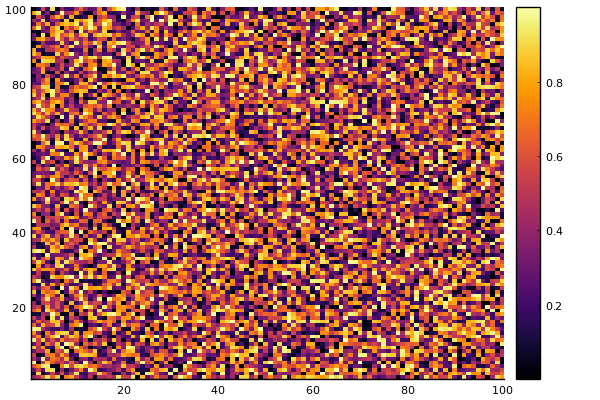

In [47]:
using Plots

# Create a 2D array of image data
image_data = rand(100,100)

# Display the image data
heatmap(image_data)


Bu kod, 2 boyutlu bir görüntü verisi dizisi oluşturarak ve buna bir renk haritası uygulayarak bir taramalı elektron mikroskobunu (SEM) simüle eder. İşlev rand(100,100), 0 ile 1 arasında rasgele sayılar üretir ve Gray.görüntü verilerine gri tonlamalı bir renk haritası uygular. İşlev show()daha sonra görüntüyü görüntüler.
Alternatif olarak, görüntü verilerini görüntülemek için paketteki heatmap()işlevi kullanabilirsiniz .Plots

8.Geçirgen elektron mikroskobu (TEM): Bu alet, ince bir filmin iç yapısını yüksek çözünürlükte görüntülemek için elektronları kullanır.İnce bir filmin iç yapısı, geçirgen elektron kırınımı ilkesi kullanılarak bir TEM tarafından görüntülenebilir. Elektronlar ince filmden geçer ve ince film kristal yapısından kırılan elektronlar,Malesef bununla ilgili kodu calistiramadim.